# Forsøk: Hvordan varier ML-performance for de forskjellige sifrene?

## Hypotese: Det vil være lettere å klassifisere deweys dess flere siffer dem har, siden innholdet er mer spesifisert?

In [135]:

# Importerer det egenproduserte biblioteket nb_ml
import sys
sys.path.append('/home/ubuntu/PycharmProjects_saved/tgpl_w_oop')
from nb_ml import utils_nb
import pandas as pd
folder = "/home/ubuntu/PycharmProjects_saved/tgpl_w_oop/data_set/tgcForOptimization/tgcForOptimization"
articles = utils_nb.get_articles_from_folder_several_deweys(folder)

print(articles.describe()) 


        dewey                                          file_name  \
count   14567                                              14567   
unique   3552                                              14567   
top     36229  urndoi104045tidsskr100190Ambulansesakennoeålæreav   
freq      604                                                  1   

                                                     text  
count                                               14567  
unique                                              14278  
top      samtideninnhold Billettmerket Ikke forambisiø...  
freq                                                   15  


Det første steget er å få en oversikt over hvilke deweys vi har og hvor mange vi har av hver. For å få et inntrykk så skriver vi ut en liste over de 40 øverste. Dette vil også gi oss en formening om hvilke 3,4, 5 og 6 sifrede deweys som kan være aktuelle for videre forsøk.


In [175]:

topN = articles["dewey"].value_counts().head(60)
print("dewey       frekvens")
print(topN)


dewey       frekvens
36229         604
839823        141
362293        137
3621          129
3622          126
34304         116
3627          100
362204         96
6168915        90
351481         90
362292         79
30223          75
306            70
34602          58
379481         58
3412422        57
61092          56
34705          54
34206          53
9072           53
34306          53
75981          52
657            51
34401          48
3521409481     47
30712          47
34606          47
0014           46
37817          45
30542          44
3637387        44
327481         44
61612          44
36211068       44
341481         43
34202          42
34603          42
33263          42
34604          42
610711         41
7114           40
331257         40
839821         40
34505          40
30072          39
193            39
61578          39
3523           39
6167           37
3058           36
3053           36
343055         35
610730711      34
3401           34
346043 

Fra tabellen over ser vi at vi har en rekke lovende kandidater for videre forsøk. Jeg lister dem opp ved siden av antall deweys, frekvens er i parentes:
- 10-siffer: 3521409481(47)

- 7-siffer: 6168915 (90), 3412422(57)
- 6-siffer: 839823 (141), 362293(137), 362204(96), 362292(79),379481(58)
- 5-siffer: 36229 (604), 34304(116), 30223(75), 34602(58)
- 4-siffer: 3621(129), 3622(126),3627(100), 34602(58),9072(53)
- 3-siffer: 306(70), 657(51)

In [183]:
#Making dataframes only containing articles from this selection of deweys. Dataframe for each deweylength.
dewey10 = ["3521409481"]
dewey10_df = articles.loc[articles['dewey'].isin(dewey10)].copy()

dewey7 = ["6168915", "3412422"]
dewey7_df = articles.loc[articles['dewey'].isin(dewey7)].copy()

dewey6 = ["839823", "362293", "362204", "362292", "379481"].copy()
dewey6_df = articles.loc[articles['dewey'].isin(dewey6)]

dewey5 = ["36229", "34304", "30223", "34602"]
#dewey5 = ["34304", "30223", "34602"]
dewey5_df = articles.loc[articles['dewey'].isin(dewey5)].copy()

dewey4 = ["3621", "3622", "3627", "9072"]
dewey4_df = articles.loc[articles['dewey'].isin(dewey4)].copy()

dewey3 = ["306", "657", "193"]
dewey3_df = articles.loc[articles['dewey'].isin(dewey3)].copy()


## Tekstlengder målt i ord


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


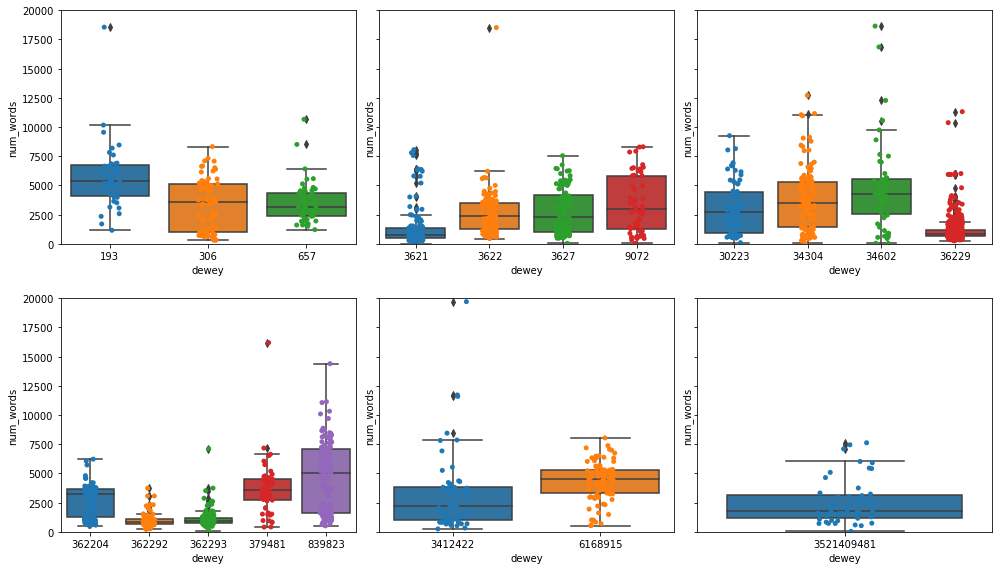

In [184]:
#For further analysis of the data I want to look at the length of the texts and how this differs from class to class
# The first thing I need to do then is to add a column with length of text.
dewey10_df["num_words"] = dewey10_df["text"].str.split().str.len()
dewey7_df["num_words"] = dewey7_df["text"].str.split().str.len()
dewey6_df["num_words"] = dewey6_df["text"].str.split().str.len()
dewey5_df["num_words"] = dewey5_df["text"].str.split().str.len()
dewey4_df["num_words"] = dewey4_df["text"].str.split().str.len()
dewey3_df["num_words"] = dewey3_df["text"].str.split().str.len()
#print(dewey3_df["char_length"])
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#dewey3_df.plot(x =dewey3_df["char_length"], style='o')
fig, axs = plt.subplots(nrows = 2, ncols=3, sharey = True)

sns.boxplot(x = "dewey", y = "num_words", data =dewey3_df, ax=axs[0,0])
sns.stripplot(x = "dewey", y = "num_words", data =dewey3_df, jitter = True,edgecolor= "yellow", ax=axs[0,0])

sns.boxplot(x = "dewey", y = "num_words", data =dewey4_df, ax=axs[0,1])
sns.stripplot(x = "dewey", y = "num_words", data =dewey4_df, jitter = True,edgecolor= "yellow", ax=axs[0,1])

sns.boxplot(x = "dewey", y = "num_words", data =dewey5_df, ax=axs[0,2])
sns.stripplot(x = "dewey", y = "num_words", data =dewey5_df, jitter = True,edgecolor= "yellow", ax=axs[0,2])

sns.boxplot(x = "dewey", y = "num_words", data =dewey6_df, ax=axs[1,0])
sns.stripplot(x = "dewey", y = "num_words", data =dewey6_df, jitter = True,edgecolor= "yellow", ax=axs[1,0])

sns.boxplot(x = "dewey", y = "num_words", data =dewey7_df, ax=axs[1,1])
sns.stripplot(x = "dewey", y = "num_words", data =dewey7_df, jitter = True,edgecolor= "yellow", ax=axs[1,1])

sns.boxplot(x = "dewey", y = "num_words", data =dewey10_df, ax=axs[1,2])
sns.stripplot(x = "dewey", y = "num_words", data =dewey10_df, jitter = True,edgecolor= "yellow", ax=axs[1,2])
plt.tight_layout(pad=1.0, w_pad=0.5, h_pad=2.0)
# Set figure width to 12 and height to 9
fig_size=[0,0]
fig_size[0] = 14
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.ylim(0, 20000)
plt.show()


## Gjennomsnittlig ordlengde


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


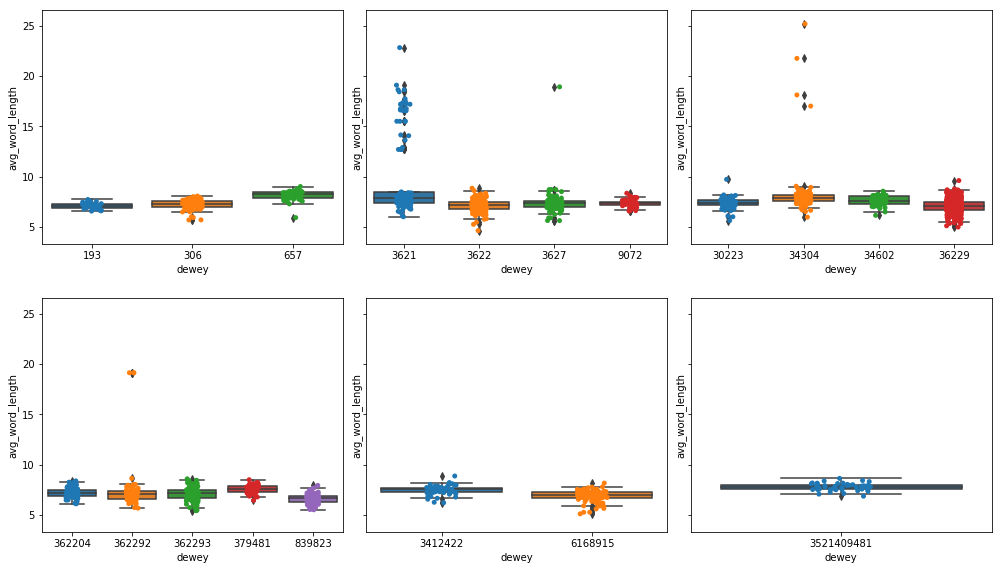

In [185]:
##La oss nå ta en kikk på gjennomsnittlig ordlengde for de forskjellige artiklene.
dewey10_df["char_length"] = dewey10_df["text"].str.strip().str.len()
dewey10_df["avg_word_length"] = dewey10_df["char_length"]/dewey10_df["num_words"]

dewey7_df["char_length"] = dewey7_df["text"].str.strip().str.len()
dewey7_df["avg_word_length"] = dewey7_df["char_length"]/dewey7_df["num_words"]

dewey6_df["char_length"] = dewey6_df["text"].str.strip().str.len()
dewey6_df["avg_word_length"] = dewey6_df["char_length"]/dewey6_df["num_words"]

dewey5_df["char_length"] = dewey5_df["text"].str.strip().str.len()
dewey5_df["avg_word_length"] = dewey5_df["char_length"]/dewey5_df["num_words"]

dewey4_df["char_length"] = dewey4_df["text"].str.strip().str.len()
dewey4_df["avg_word_length"] = dewey4_df["char_length"]/dewey4_df["num_words"]

dewey3_df["char_length"] = dewey3_df["text"].str.strip().str.len()
dewey3_df["avg_word_length"] = dewey3_df["char_length"]/dewey3_df["num_words"]


fig, axs = plt.subplots(nrows = 2, ncols=3, sharey = True)

sns.boxplot(x = "dewey", y = "avg_word_length", data =dewey3_df, ax=axs[0,0])
sns.stripplot(x = "dewey", y = "avg_word_length", data =dewey3_df, jitter = True,edgecolor= "yellow", ax=axs[0,0])

sns.boxplot(x = "dewey", y = "avg_word_length", data =dewey4_df, ax=axs[0,1])
sns.stripplot(x = "dewey", y = "avg_word_length", data =dewey4_df, jitter = True,edgecolor= "yellow", ax=axs[0,1])

sns.boxplot(x = "dewey", y = "avg_word_length", data =dewey5_df, ax=axs[0,2])
sns.stripplot(x = "dewey", y = "avg_word_length", data =dewey5_df, jitter = True,edgecolor= "yellow", ax=axs[0,2])

sns.boxplot(x = "dewey", y = "avg_word_length", data =dewey6_df, ax=axs[1,0])
sns.stripplot(x = "dewey", y = "avg_word_length", data =dewey6_df, jitter = True,edgecolor= "yellow", ax=axs[1,0])

sns.boxplot(x = "dewey", y = "avg_word_length", data =dewey7_df, ax=axs[1,1])
sns.stripplot(x = "dewey", y = "avg_word_length", data =dewey7_df, jitter = True,edgecolor= "yellow", ax=axs[1,1])

sns.boxplot(x = "dewey", y = "avg_word_length", data =dewey10_df, ax=axs[1,2])
sns.stripplot(x = "dewey", y = "avg_word_length", data =dewey10_df, jitter = True,edgecolor= "yellow", ax=axs[1,2])
plt.tight_layout(pad=1.0, w_pad=0.5, h_pad=2.0)
# Set figure width to 12 and height to 9
fig_size=[0,0]
fig_size[0] = 14
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
#plt.ylim(0, 20000)
plt.show()


# Scenarioer for testing
- 3 vs 4
- 3 vs 5
- 3 vs 6
- 3 vs 7
- 3 vs 10

In [194]:
import sys
sys.path.append('/home/ubuntu/PycharmProjects_saved/tgpl_w_oop/nb_ml')
from nb_ml import logreg
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score
import matplotlib.cm as cm
import numpy as np
from collections import OrderedDict
import pylab
from sklearn.neighbors.classification import KNeighborsClassifier
class dewey_test():
    
    def __init__(self, data):
        self.corpus_dataframe = data.copy()
        self.filtered_corpus = []
        self.x_train = None
        self.y_train = None
        self.x_test = None
        self.y_test = None
        self.model = None
        self.predictions = None
        self.results = None
        self.accuracy = None
    def preprocessing(self, numArticlesPerDewey=2, strict = False):
        filtered_texts = []
        if strict == True:
            self.getStrictArticleSelection(numArticlesPerDewey)
        for text in self.corpus_dataframe["text"].values:
            tokenized_text = word_tokenize(text = str(text), language = "norwegian")
        self.y_train = self.corpus_dataframe["dewey"].tolist()
        self.y_test = self.corpus_dataframe["dewey"].tolist()
    def splitToTrainingAndTest(self, stratified):
        x = self.corpus_dataframe["text"].tolist()
        y = self.corpus_dataframe["dewey"].tolist()
        if stratified == True:
            self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y,test_size = 0.2, stratify = y,random_state = 42)
        #else:
        #    self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y,test_size = 0.2,random_state = 42)
    def fit(self):
        count_vectorizer = CountVectorizer(max_features = 10000)
        self.x_train = count_vectorizer.fit_transform(self.x_train)
        self.x_test = count_vectorizer.transform(self.x_test)
    def train(self):
        self.model = LogisticRegression() 
        self.model.fit(self.x_train, self.y_train)
    def predict(self):
        #print(self.x_test[0])
        self.predictions = self.model.predict(self.x_test)
        self.results = classification_report(self.y_test, self.predictions)
        self.getAccuracy()
    def getAccuracy(self):
        self.accuracy = accuracy_score(self.y_test, self.predictions)
    def printResults(self):
        print(str(self.results) +"\n")
        print("Accuracy:"+ str(self.accuracy))
    
    def tsne(self):
        
        X_reduced = TruncatedSVD(n_components = 50, random_state=0).fit_transform(self.x_train)
        X_embedded = TSNE(n_components =2, perplexity = 40, random_state = 0).fit_transform(X_reduced)
        
        colors = cm.rainbow(np.linspace(0,1,len(set(self.y_train))))
        unique_labels = set(self.y_train)
        color_dictionary = dict(zip(unique_labels, colors))
        
        color_list = []
        for label in self.y_train:
            color_list.append(color_dictionary[str(label)])
        for i in range(0,len(self.y_train)):    
            plt.scatter(X_embedded[i,0], X_embedded[i,1], c = color_list[i],label = str(self.y_train[i]), 
                        cmap = "tab20b" )
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = OrderedDict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())
        #%matplotlib inline
        plt.show()
    def getStrictArticleSelection(self, articlesPerDewey):
        np.random.seed(0)
        size = articlesPerDewey  # sample size
        replace = False  # with replacement
       
        self.corpus_dataframe =self.corpus_dataframe[self.corpus_dataframe['dewey'].isin(self.corpus_dataframe['dewey'].value_counts()[self.corpus_dataframe['dewey'].value_counts()>size-1].index)]
        fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace), :]
        self.corpus_dataframe = self.corpus_dataframe.groupby('dewey', as_index=False).apply(fn)
        #self.corpus_dataframe = corpus_dataframe
        #return corpus_dataframe
    def plotDecisionSurface(self):
        # X - some data in 2dimensional np.array
        X_reduced = TruncatedSVD(n_components = 50, random_state=0).fit_transform(self.x_train)
        X_embedded = TSNE(n_components =2, perplexity = 40, random_state = 0).fit_transform(X_reduced)
        
        
        colors = cm.rainbow(np.linspace(0,1,len(set(self.y_train))))
        unique_labels = set(self.y_test)
        color_dictionary = dict(zip(unique_labels, colors))
        
        color_list = []
        for label in self.y_train:
            color_list.append(color_dictionary[str(label)])
        #for i in range(0,len(self.y_train)):    
        #    plt.scatter(X_embedded[i,0], X_embedded[i,1], c = color_list[i],label = str(self.y_train[i]), 
         #               cmap = "tab20b" )
        
        
        # create meshgrid
        resolution = 1000 # 100x100 background pixels
        X2d_xmin, X2d_xmax = np.min(X_embedded[:,0]), np.max(X_embedded[:,0])
        X2d_ymin, X2d_ymax = np.min(X_embedded[:,1]), np.max(X_embedded[:,1])
        xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

        # approximate Voronoi tesselation on resolution x resolution grid using 1-NN
        background_model = KNeighborsClassifier(n_neighbors=1).fit(X_embedded, self.y_train) 
        voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
        voronoiBackground = voronoiBackground.reshape(xx.shape)
        #for i in range(0,len(self.y_train)):
        #plt.contourf(xx, yy, voronoiBackground, c = color_list, cmap=plt.cm.Paired)
        
        plt.contourf(xx, yy, voronoiBackground, cmap=plt.cm.Paired)
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = OrderedDict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())
        for i in range(0,len(self.y_train)):    
            plt.scatter(X_embedded[i,0], X_embedded[i,1], c = color_list[i],label = str(self.y_train[i]), 
                        cmap = "tab20b" )
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = OrderedDict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())
        #plt.scatter(X_embedded[:,0], X_embedded[:,1], c=self.y_train)
        plt.show()
        


### Offisiell Test 1: 362

## Deltest 1.1: 

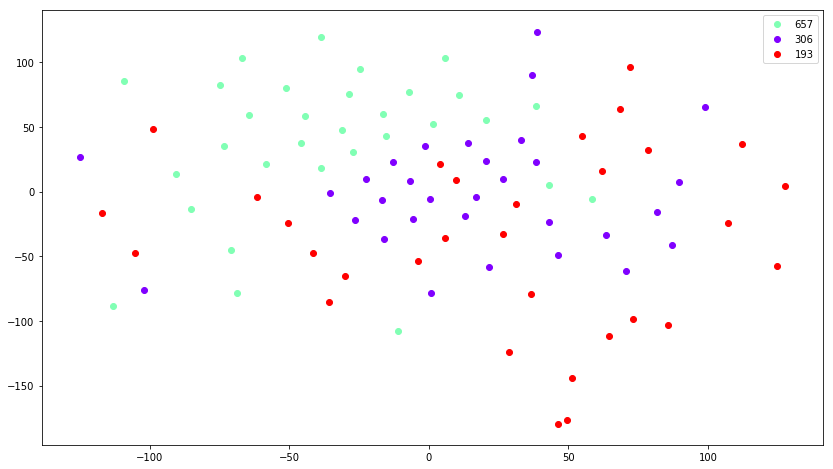

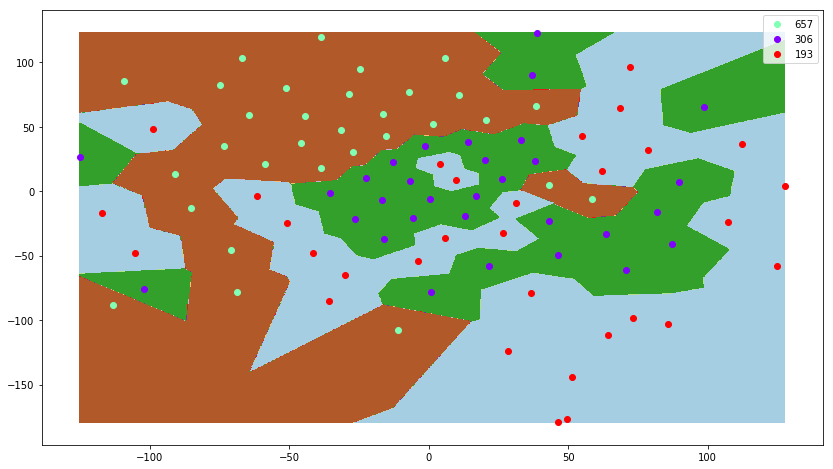

             precision    recall  f1-score   support

        193       0.88      0.88      0.88         8
        306       0.88      0.88      0.88         8
        657       1.00      1.00      1.00         8

avg / total       0.92      0.92      0.92        24


Accuracy:0.916666666667


In [195]:
test = dewey_test(dewey3_df)
test.preprocessing(numArticlesPerDewey=39, strict = True)
test.splitToTrainingAndTest(stratified = True)
test.fit()
test.train()
test.predict()
test.tsne()
test.plotDecisionSurface()
test.printResults()

In [203]:
## Hjelpefunksjoner
def getDeweyAndAllSubdeweys(deweynr, corpus):
    
    filter_col = [col for col in articles["dewey"] if col.startswith(deweynr)]
    dfWithDeweyAndSubdeweys = corpus.loc[corpus['dewey'].isin(filter_col)].copy()
    return dfWithDeweyAndSubdeweys

def sliceDewey(x,length):
    if len(x)==length:
        return x[:length]
    else:
        return x[:]
def joinDeweysDfs(*args):
    all_dfs = []
    for arg in args:
        all_dfs.append(arg)
    joined_df = pd.concat(all_dfs)
    return joined_df

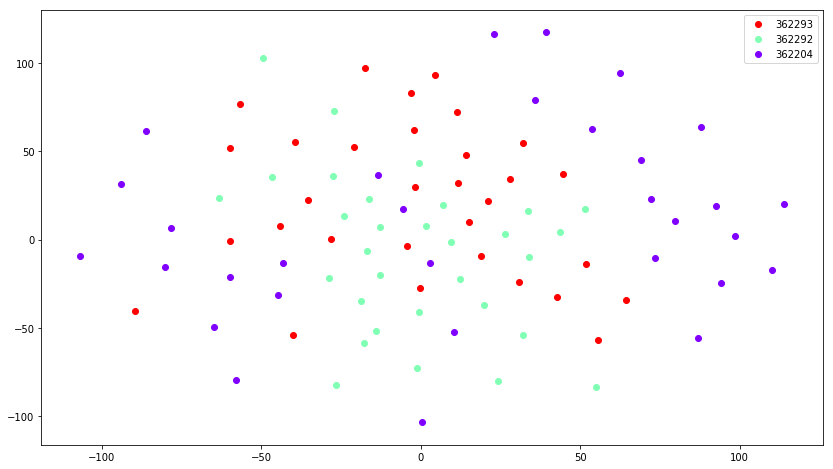

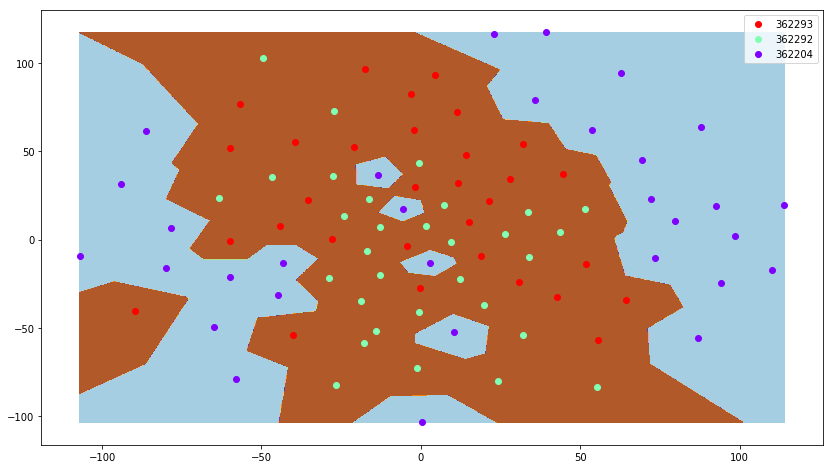

             precision    recall  f1-score   support

     362204       0.88      0.88      0.88         8
     362292       1.00      0.88      0.93         8
     362293       0.89      1.00      0.94         8

avg / total       0.92      0.92      0.92        24


Accuracy:0.916666666667


In [209]:
df_362 = getDeweyAndAllSubdeweys("362", articles)
mask = (df_362['dewey'].str.len() == 6)
df_362 = df_362.loc[mask]

test = dewey_test(df_362)
test.preprocessing(numArticlesPerDewey=39, strict = True)
test.splitToTrainingAndTest(stratified = True)
test.fit()
test.train()
test.predict()
test.tsne()
test.plotDecisionSurface()
test.printResults()

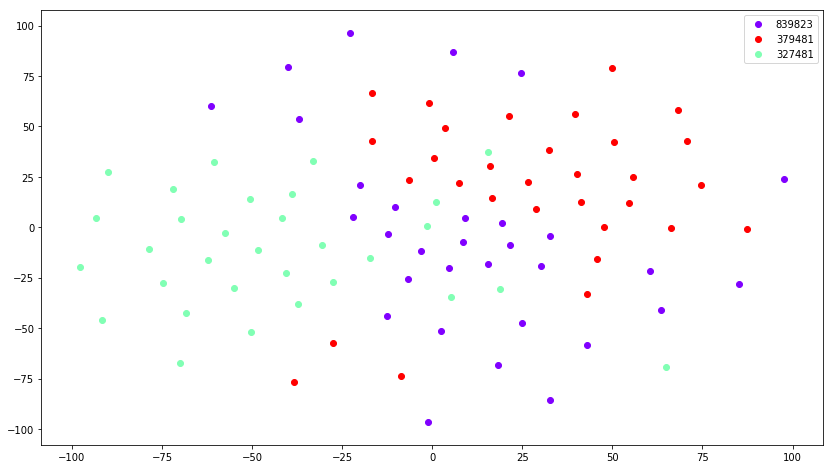

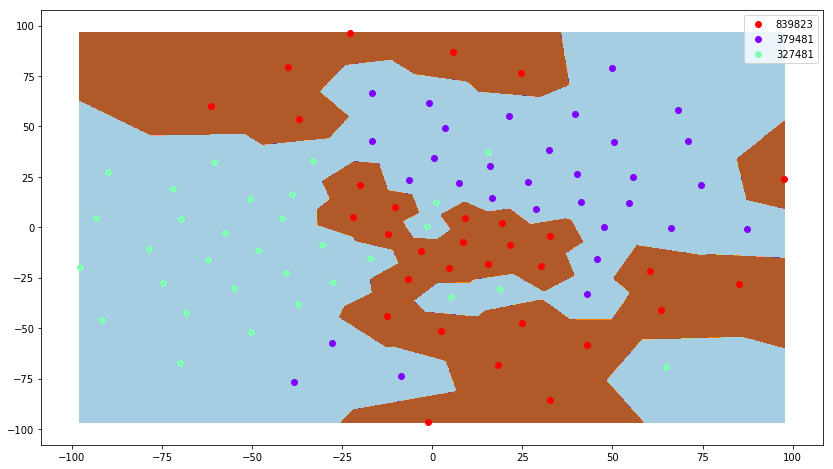

             precision    recall  f1-score   support

     327481       1.00      1.00      1.00         8
     379481       1.00      1.00      1.00         8
     839823       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        24


Accuracy:1.0


In [208]:
#839823 "379481"

df_839823 = getDeweyAndAllSubdeweys("839823", articles)
mask = (df_839823['dewey'].str.len() == 6)
df_839823 = df_839823.loc[mask]


df_379481 = getDeweyAndAllSubdeweys("379481", articles)
mask = (df_379481['dewey'].str.len() == 6)
df_379481= df_379481.loc[mask]

df_327481  = getDeweyAndAllSubdeweys("327481", articles)
mask = (df_327481 ['dewey'].str.len() == 6)
df_327481 = df_327481 .loc[mask]


joinedDF = pd.concat([df_839823, df_379481, df_327481])

test = dewey_test(joinedDF)
test.preprocessing(numArticlesPerDewey=39, strict = True)
test.splitToTrainingAndTest(stratified = True)
test.fit()
test.train()
test.predict()
test.tsne()
test.plotDecisionSurface()
test.printResults()

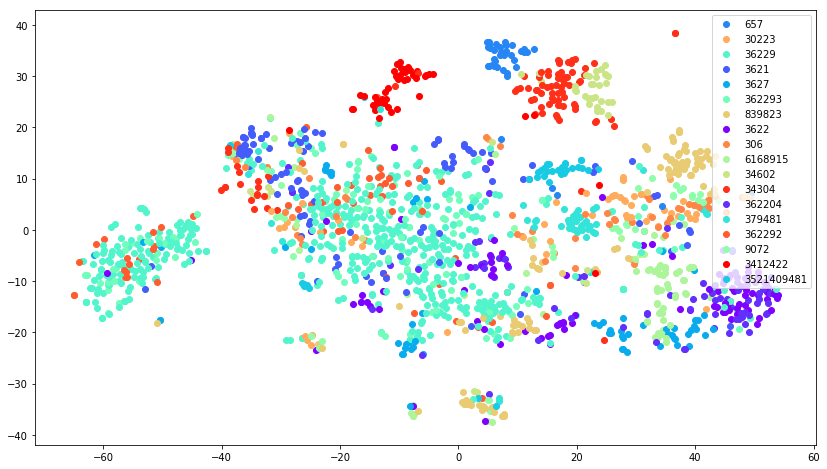

             precision    recall  f1-score   support

      30223       0.92      0.71      0.80        17
        306       0.71      0.77      0.74        13
    3412422       0.82      1.00      0.90         9
      34304       0.96      0.85      0.90        27
      34602       0.81      0.93      0.87        14
 3521409481       1.00      0.92      0.96        12
       3621       0.79      0.88      0.83        17
       3622       0.69      0.77      0.73        26
     362204       0.46      0.33      0.39        18
      36229       0.74      0.92      0.82       116
     362292       1.00      0.64      0.78        14
     362293       0.71      0.54      0.61        28
       3627       0.91      0.66      0.76        32
     379481       1.00      0.80      0.89        10
    6168915       0.87      0.87      0.87        15
        657       1.00      0.92      0.96        13
     839823       0.96      0.88      0.92        26
       9072       0.91      0.91      0.91   

In [145]:
        
all_frames = [dewey3_df,dewey4_df,dewey5_df,dewey6_df, dewey7_df, dewey10_df]        
all_deweys = pd.concat(all_frames)
test = dewey_test(all_deweys)
test.preprocessing()
test.splitToTrainingAndTest()
test.fit()
test.train()
test.predict()
test.tsne()
test.printResults()

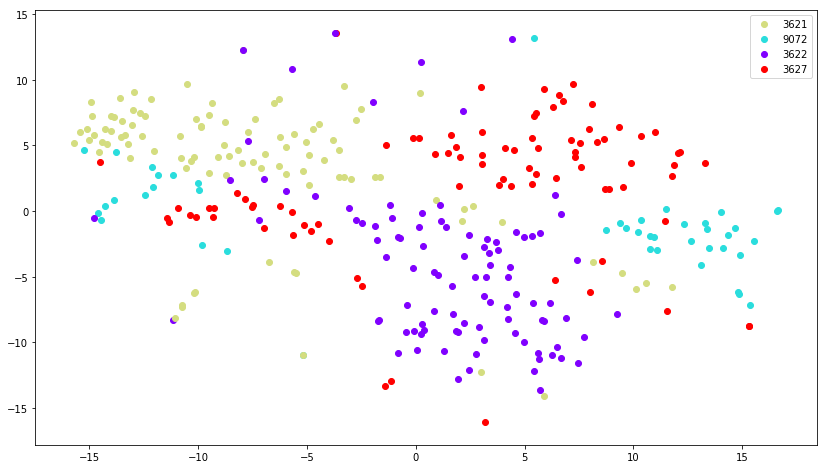

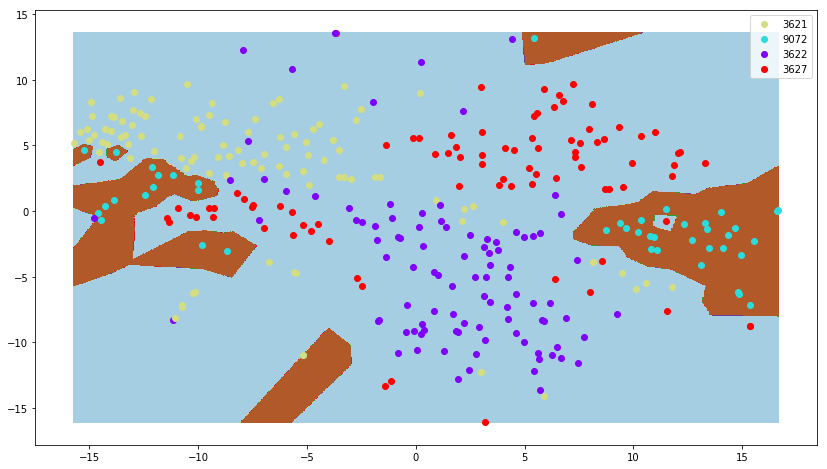

             precision    recall  f1-score   support

       3621       1.00      0.97      0.98        30
       3622       0.97      1.00      0.98        29
       3627       0.92      0.86      0.89        14
       9072       0.90      1.00      0.95         9

avg / total       0.96      0.96      0.96        82


Accuracy:0.963414634146


In [128]:
test = dewey_test(dewey4_df)
test.preprocessing()
test.splitToTrainingAndTest()
test.fit()
test.train()
test.predict()
test.tsne()
test.plotDecisionSurface()
test.printResults()


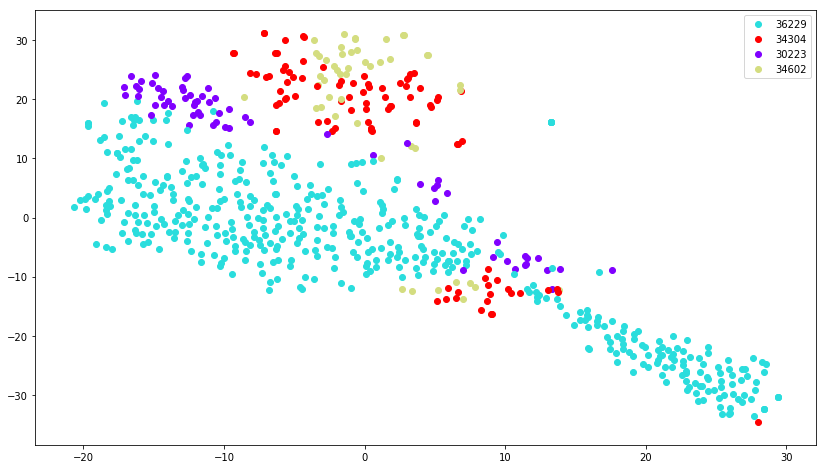

             precision    recall  f1-score   support

      30223       1.00      0.90      0.95        10
      34304       1.00      0.91      0.95        22
      34602       1.00      1.00      1.00        10
      36229       0.98      1.00      0.99       129

avg / total       0.98      0.98      0.98       171


Accuracy:0.982456140351


In [52]:
test = dewey_test(dewey5_df)
test.preprocessing()
test.splitToTrainingAndTest()
test.fit()
test.train()
test.predict()
test.tsne()
test.printResults()

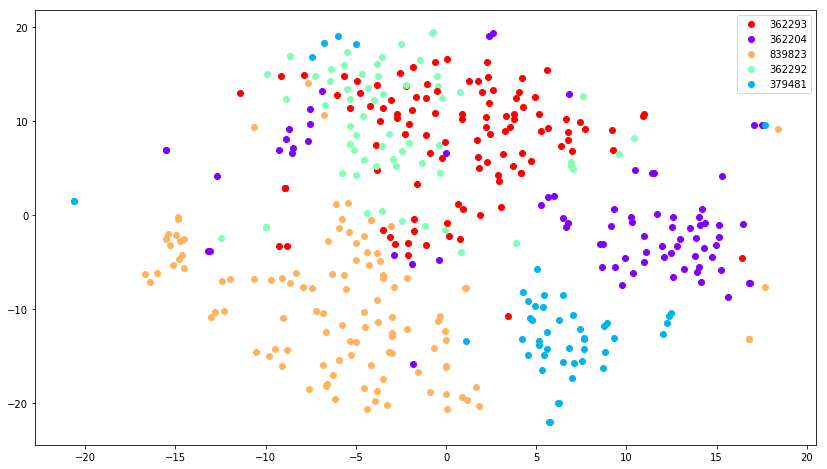

             precision    recall  f1-score   support

     362204       1.00      0.94      0.97        18
     362292       1.00      1.00      1.00        15
     362293       0.97      1.00      0.98        31
     379481       1.00      0.89      0.94         9
     839823       0.97      1.00      0.98        30

avg / total       0.98      0.98      0.98       103


Accuracy:0.980582524272


In [53]:
test = dewey_test(dewey6_df)
test.preprocessing()
test.splitToTrainingAndTest()
test.fit()
test.train()
test.predict()
test.tsne()
test.printResults()

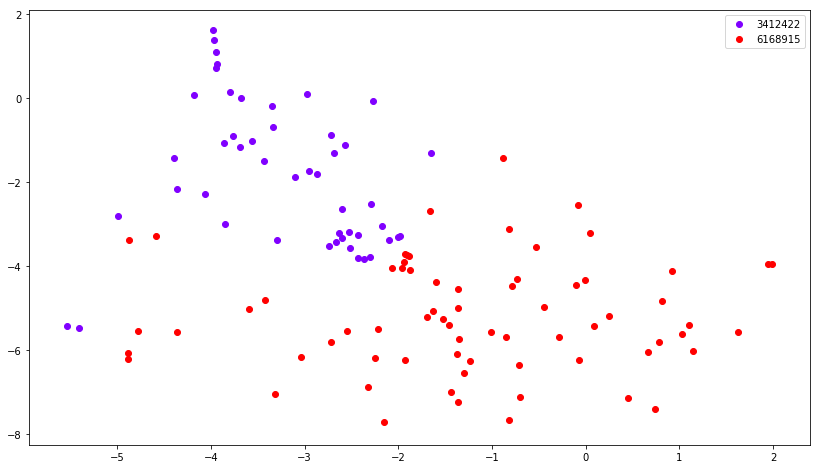

             precision    recall  f1-score   support

    3412422       1.00      1.00      1.00         9
    6168915       1.00      1.00      1.00        21

avg / total       1.00      1.00      1.00        30


Accuracy:1.0


In [54]:
test = dewey_test(dewey7_df)
test.preprocessing()
test.splitToTrainingAndTest()
test.fit()
test.train()
test.predict()
test.tsne()
test.printResults()

## Test 1 Dewey 362
Velger å sammenligne med resultater fra tidligere test der vi testet alle 3 sifrede dewey. Da ble nøkkeltallene for 362 slik:
precision    recall  f1-score  Support (antall)
  0.52        0.90      0.66    405


### Første deltest er å teste 362 der vi bruker full sifferlengde:

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1134: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1136: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


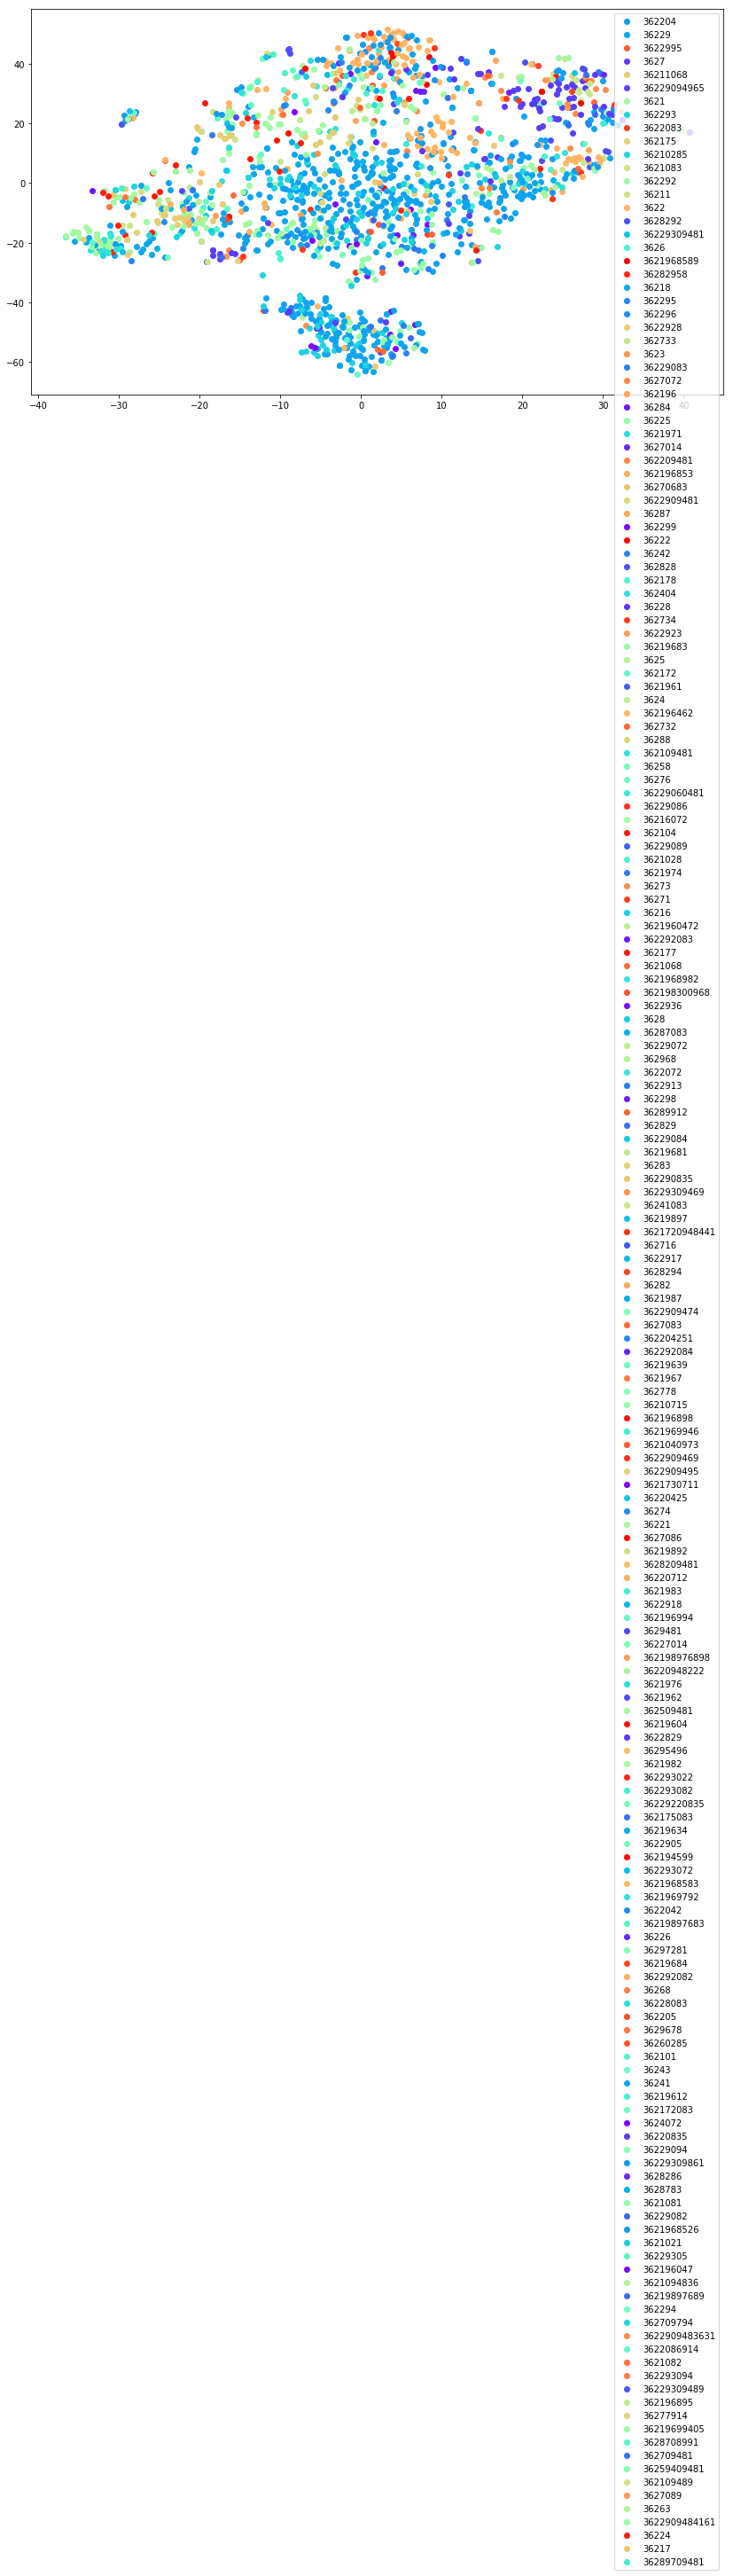

NameError: name 'X_Train_embedded' is not defined

In [58]:
df_362 = getDeweyAndAllSubdeweys("362", articles)


test = dewey_test(df_362)
test.preprocessing()
test.splitToTrainingAndTest()
test.fit()
test.train()
test.predict()
test.tsne()
test.plotDecisionSurface()
test.printResults()


#### Delkonklusjon 1:
Her ser vi at resultatene blir følgende:
     precision    recall  f1-score   support
        0.41      0.53      0.45       406
Ut fra dette ser man at presisjonen, recallen og f1-score går ned hvis man har hele deweylengden med. 
Dette er på grunn av at majoriteten av deweynrene har 1 eller få dokumenter i treningssettet. Dette gjør at det ikke er nok treningsgrunnlag til å skille disse fra resten av deweynr.

### Deltest 2 er å bruke en begrensing på 6 siffer. Hvis sifferet er lengre enn 6 så plukker vi ut de 6 første. 


### Deltest 4 er å bruke en begrensing på 4 siffer. Hvis sifferet er lengre enn 4 så plukker vi ut de 4 første. 

#### Delkonklusjon 2:
Her ser vi at vi får en del bedre resultater enn da vi hadde alle sifrene:
Presisjon: 0.46      Recall: 0.55      F1-score: 0.49       Antall dokumenter i testsett: 406
Dette er trolig fordi vi får gruppert alle de mindre klassene under sine "overklasser" slik at vi får større klasser med like kjennetegn. 

### Deltest 3: 5 siffer:

In [ ]:
df_362["dewey"]= df_362["dewey"].apply(sliceDewey,length=5)
print(df_362.head(10))
#df_362["dewey"]= np.where(len(df_362["dewey"])>4, df_362["dewey"][:4],df_362["dewey"])
#df_362['dewey'] = df_362['dewey'].astype(str).apply(lambda x: len(x)>4).str[:4]

test = dewey_test(df_362)
test.preprocessing()
test.splitToTrainingAndTest()
test.fit()
test.train()
test.predict()
test.tsne()
test.printResults()

#### Delkonklusjon 3:

Her ser vi at vi får en del bedre resultater enn da vi hadde alle sifrene: Presisjon: 0.46 Recall: 0.55 F1-score: 0.49 Antall dokumenter i testsett: 406 Dette er trolig fordi vi får gruppert alle de mindre klassene under sine "overklasser" slik at vi får større klasser med like kjennetegn.


### Deltest 4: 4 siffer

In [ ]:
df_362["dewey"]= df_362["dewey"].apply(sliceDewey,length=4)

test = dewey_test(df_362)
test.preprocessing()
test.splitToTrainingAndTest()
test.fit()
test.train()
test.predict()
test.tsne()
test.printResults()

### Delkonklusjon 4
HER MÅ NOE SKRIVES


## Test 2: Dewey 616

 616      Presisjon: 0.64      Recall: 0.72     f1-score: 0.67      Antall: 158


### Deltest 1: Alle


In [ ]:
df_616 = getDeweyAndAllSubdeweys("616", articles)


test = dewey_test(df_616)
test.preprocessing()
test.splitToTrainingAndTest()
test.fit()
test.train()
test.predict()
test.tsne()
test.printResults()

### Delkonklusjon 1

### Deltest 2: 6 siffer

In [ ]:
df_616["dewey"]= df_616["dewey"].apply(sliceDewey,length=6)


test = dewey_test(df_616)
test.preprocessing()
test.splitToTrainingAndTest()
test.fit()
test.train()
test.predict()
test.tsne()
test.printResults()

### Delkonklusjon 2

### Deltest 3: 5 Siffer

In [ ]:
df_616["dewey"]= df_616["dewey"].apply(sliceDewey,length=5)


test = dewey_test(df_616)
test.preprocessing()
test.splitToTrainingAndTest()
test.fit()
test.train()
test.predict()
test.tsne()
test.printResults()

### Delkonklusjon 3:

### Deltest 4: 4 Siffer

In [ ]:
df_616["dewey"]= df_616["dewey"].apply(sliceDewey,length=4)


test = dewey_test(df_616)
test.preprocessing()
test.splitToTrainingAndTest()
test.fit()
test.train()
test.predict()
test.tsne()
test.printResults()

In [ ]:
test = dewey_test(dewey3_df)
#print(test.corpus_dataframe.describe())
test.preprocessing(50)

test.splitToTrainingAndTest()
test.fit()
test.train()
test.predict()
test.tsne()
#test.plotDecisionSurface()
test.printResults()

In [ ]:
df_616 = getDeweyAndAllSubdeweys("616", articles)
df_616["dewey"]= df_616["dewey"].apply(sliceDewey,length=4)
test = dewey_test(df_616)
test.preprocessing(10)
test.splitToTrainingAndTest()
test.fit()
test.train()
test.predict()
test.tsne()
test.printResults()